<a href="https://colab.research.google.com/github/GitOlivier10/biodiversity-starter/blob/main/biodiversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Config espace

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kendalltau, spearmanr
from scipy.stats import skew

In [2]:
import pandas as pd

# URL du fichier observations.csv sur GitHub pointing to the raw data file
observations_url = "https://raw.githubusercontent.com/GitOlivier10/biodiversity-starter/main/observations.csv"

# Importer le fichier CSV
observations_csv = pd.read_csv(observations_url)

# Afficher les données
display(observations_csv)

# URL du fichier species_info.csv sur GitHub pointing to the raw data file
species_info_url = "https://raw.githubusercontent.com/GitOlivier10/biodiversity-starter/main/species_info.csv"

# Importer le fichier CSV
species_info_csv = pd.read_csv(species_info_url)

# Afficher les données
display(species_info_csv)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [3]:
import pandas as pd

# URL du fichier observations.csv sur GitHub
observations_url = "https://raw.githubusercontent.com/GitOlivier10/biodiversity-starter/main/observations.csv"

# Importer le fichier CSV
observations_csv = pd.read_csv(observations_url)

# Afficher les données
display(observations_csv)

# URL du fichier species_info.csv sur GitHub
species_info_url = "https://raw.githubusercontent.com/GitOlivier10/biodiversity-starter/main/species_info.csv"

# Importer le fichier CSV
species_info_csv = pd.read_csv(species_info_url)

# Afficher les données
display(species_info_csv)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [4]:
df_merged = observations_csv.merge(species_info_csv, on='scientific_name', how='inner')
new_order = ['scientific_name', 'common_names', 'category', 'park_name', 'observations', 'conservation_status']
df_merged = df_merged[new_order]
display(df_merged)

,scientific_name,common_names,category,park_name,observations,conservation_status
0,Vicia benghalensis,"Purple Vetch, Reddish Tufted Vetch",Vascular Plant,Great Smoky Mountains National Park,68,NaN
1,Neovison vison,American Mink,Mammal,Great Smoky Mountains National Park,77,NaN
2,Prunus subcordata,Klamath Plum,Vascular Plant,Yosemite National Park,138,NaN
3,Abutilon theophrasti,Velvetleaf,Vascular Plant,Bryce National Park,84,NaN
4,Githopsis specularioides,Common Bluecup,Vascular Plant,Great Smoky Mountains National Park,85,NaN
...,...,...,...,...,...,...
25627,Croton monanthogynus,Prairie Tea,Vascular Plant,Yosemite National Park,173,NaN
25628,Otospermophilus beecheyi,California Ground Squirrel,Mammal,Bryce National Park,130,NaN
25629,Heterotheca sessiliflora ssp. echioides,Sessileflower False Goldenaster,Vascular Plant,Bryce National Park,140,NaN
25630,Dicranella rufescens,Dicranella Moss,Nonvascular Plant,Yosemite National Park,171,NaN


Exploration of data

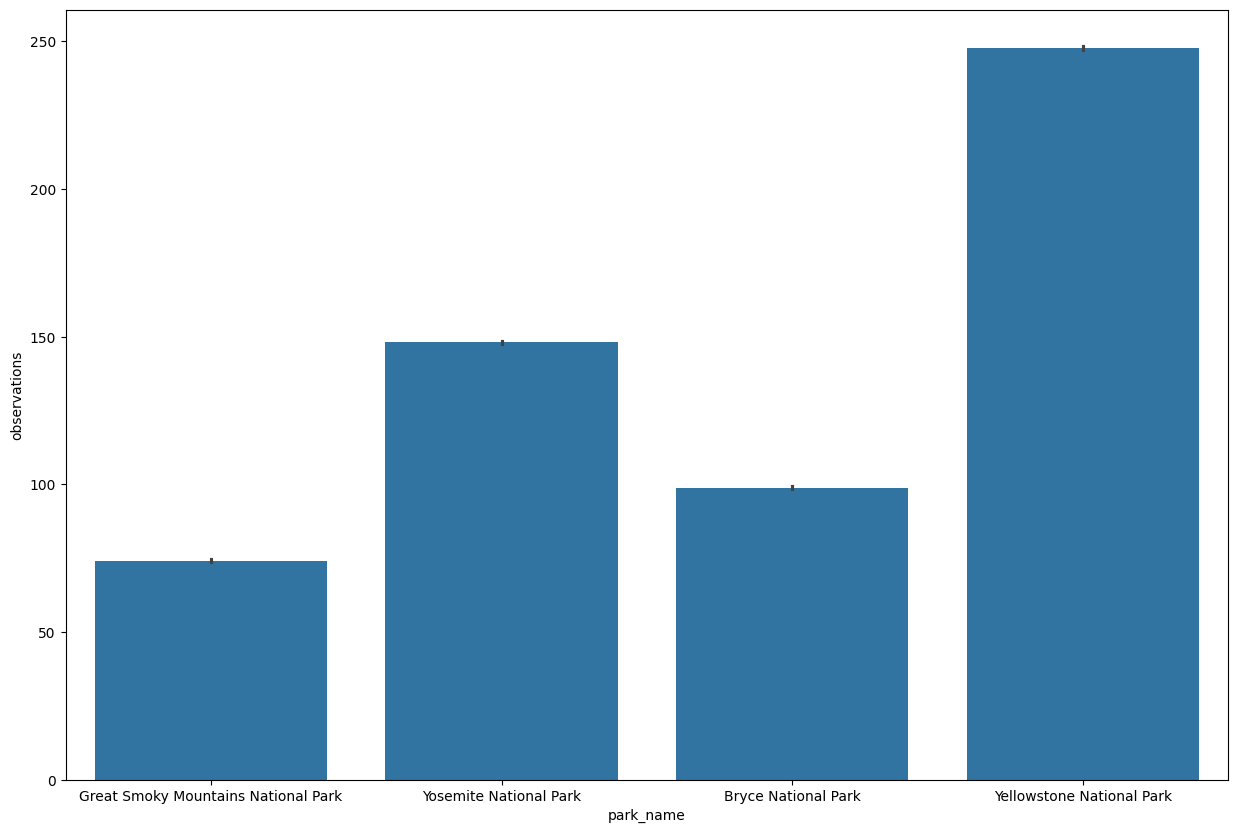

In [5]:
y = df_merged['observations'].groupby(df_merged['park_name']).sum()
x = df_merged['park_name'].unique()

plt.figure(figsize=(15, 10))
sns.barplot(data = df_merged, x = 'park_name', y = 'observations')
plt.xticks(rotation=0)
plt.show()

Questions
---

What is the distribution of conservation_status for animals?

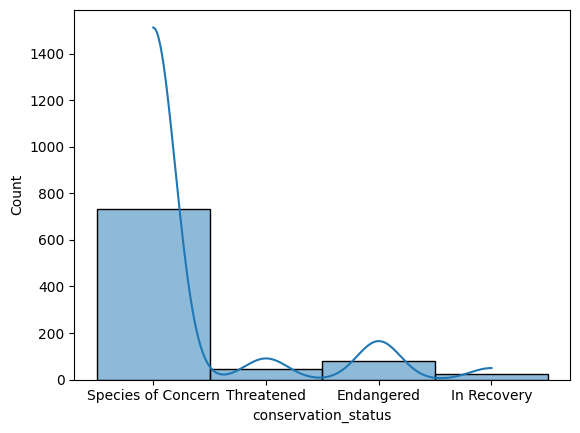

In [6]:
sns.histplot(df_merged['conservation_status'], kde=True)  # `kde=True` ajoute une courbe de densité
plt.show()

Are certain types of species more likely to be endangered?

   conservation_status           category  count
0           Endangered             Mammal     44
1           Endangered               Bird     16
2           Endangered               Fish     12
3           Endangered          Amphibian      4
4           Endangered     Vascular Plant      4
5          In Recovery               Bird     12
6          In Recovery             Mammal     12
7   Species of Concern               Bird    320
8   Species of Concern     Vascular Plant    172
9   Species of Concern             Mammal    168
10  Species of Concern  Nonvascular Plant     20
11  Species of Concern            Reptile     20
12  Species of Concern          Amphibian     16
13  Species of Concern               Fish     16
14          Threatened               Fish     20
15          Threatened          Amphibian      8
16          Threatened             Mammal      8
17          Threatened     Vascular Plant      8


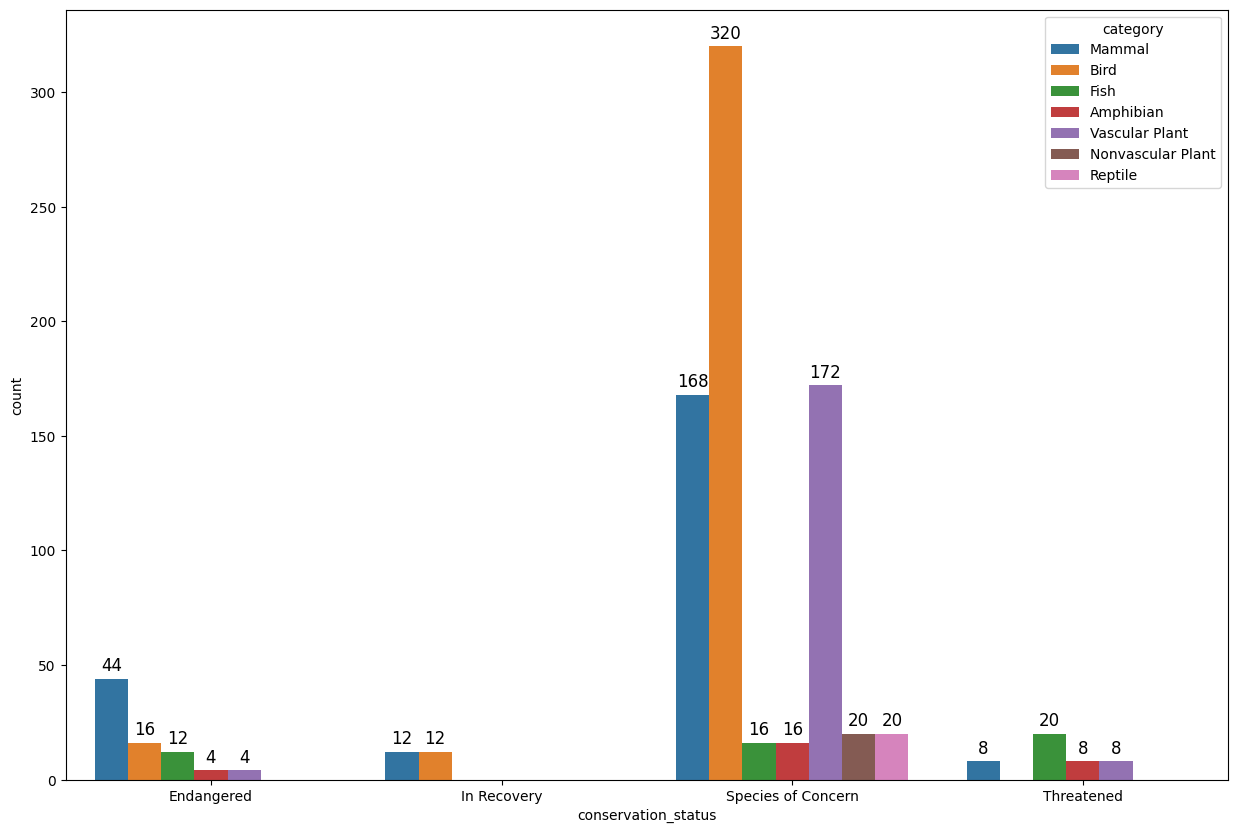

In [33]:
counts = df_merged['category'].groupby(df_merged['conservation_status']).value_counts().reset_index(name='count')
print(counts)
plt.figure(figsize=(15, 10))
ax = sns.barplot(data = counts, x = 'conservation_status', y = 'count', hue='category')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)

# Afficher le graphique
plt.show()

Are the differences between species and their conservation status significant?

Which species were spotted the most at each park?

In [8]:
#scientific_name	common_names	category	park_name	observations

df_max_rows = df_merged.loc[df_merged.groupby('park_name')['observations'].idxmax()]
display(df_max_rows)

,scientific_name,common_names,category,park_name,observations,conservation_status
14497,Valerianella radiata,"Beaked Corn-Salad, Corn Salad",Vascular Plant,Bryce National Park,176,NaN
9737,Sonchus asper ssp. asper,Spiny Sowthistle,Vascular Plant,Great Smoky Mountains National Park,147,NaN
12447,Lycopodium tristachyum,"Deep-Root Clubmoss, Ground Cedar",Vascular Plant,Yellowstone National Park,321,NaN
7355,Ivesia shockleyi var. shockleyi,"Shockley's Ivesia, Sky Mousetail",Vascular Plant,Yosemite National Park,223,NaN


Where are most of the endangered species?

In [31]:
endangered_species = df_merged["conservation_status"] == "Endangered"
#endangered_df = df_merged[endangered_species]

park_endangered_counts = endangered_df.groupby('park_name')['conservation_status'].value_counts()
park_endangered_counts = park_endangered_counts.reset_index(name='count')
#display(endangered_df)
display(park_endangered_counts)


,park_name,conservation_status,count
0,Bryce National Park,Endangered,20
1,Great Smoky Mountains National Park,Endangered,20
2,Yellowstone National Park,Endangered,20
3,Yosemite National Park,Endangered,20


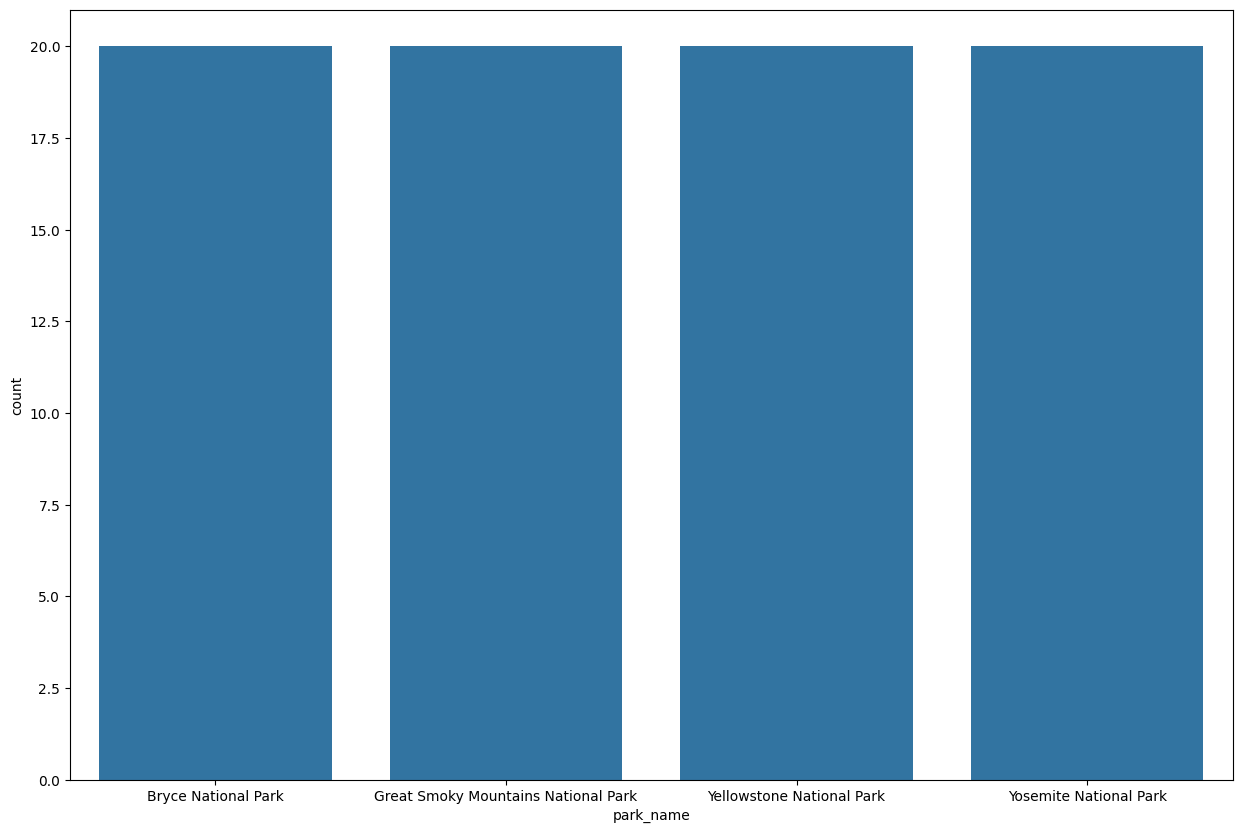

In [32]:
plt.figure(figsize=(15, 10))
sns.barplot(data = park_endangered_counts, x = 'park_name', y = 'count')
plt.xticks(rotation=0)
plt.show()